# 导入库

In [1]:
import json
import random
import sys

import mnist_loader
import network2

import matplotlib.pyplot as plt
import numpy as np

# 定义函数

In [2]:
def main(filename, num_epochs,
         training_cost_xmin=200, 
         test_accuracy_xmin=200, 
         test_cost_xmin=0, 
         training_accuracy_xmin=0,
         training_set_size=1000, 
         lmbda=0.0):
    """``filename`` is the name of the file where the results will be
    stored.  ``num_epochs`` is the number of epochs to train for.
    ``training_set_size`` is the number of images to train on.
    ``lmbda`` is the regularization parameter.  The other parameters
    set the epochs at which to start plotting on the x axis.
    """
    run_network(filename, num_epochs, training_set_size, lmbda)
    make_plots(filename, num_epochs, 
               training_cost_xmin,
               test_accuracy_xmin,
               test_cost_xmin, 
               training_accuracy_xmin,
               training_set_size)
                       
def run_network(filename, num_epochs, training_set_size=1000, lmbda=0.0):
    """Train the network for ``num_epochs`` on ``training_set_size``
    images, and store the results in ``filename``.  Those results can
    later be used by ``make_plots``.  Note that the results are stored
    to disk in large part because it's convenient not to have to
    ``run_network`` each time we want to make a plot (it's slow).

    """
    # Make results more easily reproducible
    random.seed(12345678)
    np.random.seed(12345678)
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    training_data = list(training_data)
    net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost())
    net.large_weight_initializer()
    test_cost, test_accuracy, training_cost, training_accuracy \
        = net.SGD_matrix(training_data[:training_set_size], num_epochs, 10, 0.5,
                  evaluation_data=test_data, lmbda = lmbda,
                  monitor_evaluation_cost=True, 
                  monitor_evaluation_accuracy=True, 
                  monitor_training_cost=True, 
                  monitor_training_accuracy=True)
    f = open(filename, "w")
    json.dump([test_cost, test_accuracy, training_cost, training_accuracy], f)
    f.close()

def make_plots(filename, num_epochs, 
               training_cost_xmin=200, 
               test_accuracy_xmin=200, 
               test_cost_xmin=0, 
               training_accuracy_xmin=0,
               training_set_size=1000):
    """Load the results from ``filename``, and generate the corresponding
    plots. """
    f = open(filename, "r")
    test_cost, test_accuracy, training_cost, training_accuracy \
        = json.load(f)
    f.close()
    plot_training_cost(training_cost, num_epochs, training_cost_xmin)
    plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin)
    plot_test_cost(test_cost, num_epochs, test_cost_xmin)
    plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin, training_set_size)
    plot_overlay(test_accuracy, training_accuracy, num_epochs,
                 min(test_accuracy_xmin, training_accuracy_xmin),
                 training_set_size)

def plot_training_cost(training_cost, num_epochs, training_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_cost_xmin, num_epochs), 
            training_cost[training_cost_xmin:num_epochs],
            color='#2A6EA6')
    ax.set_xlim([training_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the training data')
    plt.show()

def plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy/100.0 
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([test_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the test data')
    plt.show()

def plot_test_cost(test_cost, num_epochs, test_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_cost_xmin, num_epochs), 
            test_cost[test_cost_xmin:num_epochs],
            color='#2A6EA6')
    ax.set_xlim([test_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the test data')
    plt.show()

def plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin, training_set_size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([training_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the training data')
    plt.show()

def plot_overlay(test_accuracy, training_accuracy, num_epochs, xmin,
                 training_set_size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy/100.0 for accuracy in test_accuracy], 
            color='#2A6EA6',
            label="Accuracy on the test data")
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy], 
            color='#FFA933',
            label="Accuracy on the training data")
    ax.grid(True)
    ax.set_xlim([xmin, num_epochs])
    ax.set_xlabel('Epoch')
    ax.set_ylim([90, 100])
    plt.legend(loc="lower right")
    plt.show()


# 运行主题

Enter a file name: outputs/regularization2.json
Enter the number of epochs to run for: 30
training_cost_xmin (suggest 200): 200
test_accuracy_xmin (suggest 200): 200
test_cost_xmin (suggest 0): 0
training_accuracy_xmin (suggest 0): 0
Training set size (suggest 1000): 50000
Enter the regularization parameter, lambda (suggest: 5.0): 5.0
Epoch  0 trainging complete
Cost on training data: 1.2734727241719006
Accuracy on training data: 46164 / 50000
Cost on evaluation data: 4.290543305764438
Accuracy on evaluation data: 9216 / 10000
Epoch  1 trainging complete
Cost on training data: 0.9419156008203332
Accuracy on training data: 46721 / 50000
Cost on evaluation data: 2.9450097579588115
Accuracy on evaluation data: 9279 / 10000
Epoch  2 trainging complete
Cost on training data: 0.7565864531319688
Accuracy on training data: 46957 / 50000
Cost on evaluation data: 2.155298294414652
Accuracy on evaluation data: 9336 / 10000
Epoch  3 trainging complete
Cost on training data: 0.6028287666853158
Accu

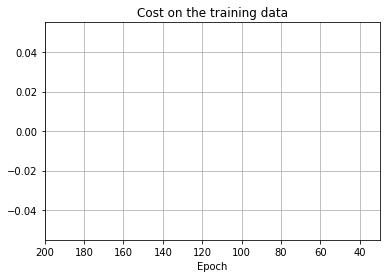

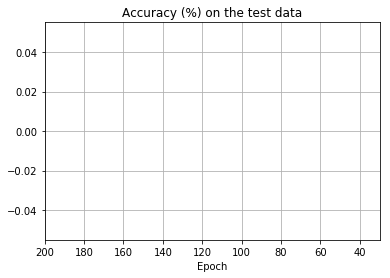

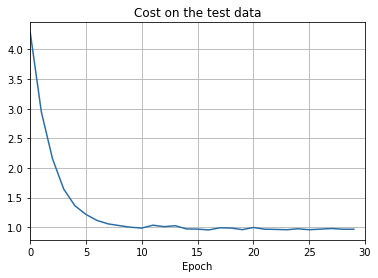

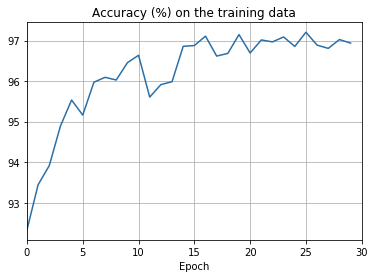

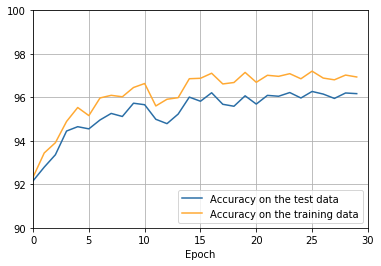

In [4]:
filename = input("Enter a file name: ")
num_epochs = int(input(
    "Enter the number of epochs to run for: "))
training_cost_xmin = int(input(
    "training_cost_xmin (suggest 200): "))
test_accuracy_xmin = int(input(
    "test_accuracy_xmin (suggest 200): "))
test_cost_xmin = int(input(
    "test_cost_xmin (suggest 0): "))
training_accuracy_xmin = int(input(
    "training_accuracy_xmin (suggest 0): "))
training_set_size = int(input(
    "Training set size (suggest 1000): "))
lmbda = float(input(
    "Enter the regularization parameter, lambda (suggest: 5.0): "))
main(filename, num_epochs, training_cost_xmin, 
     test_accuracy_xmin, test_cost_xmin, training_accuracy_xmin,
     training_set_size, lmbda)
